In [1]:
import numpy_financial as npf
!pip install numpy-financial


class Investimento(object):
    def __init__(self, taxa, fluxo_caixa):
        self.taxa: float = taxa
        self.fluxo_caixa: list[float] = fluxo_caixa

    def calc_vpl(self) -> float:
        vpl = npf.npv(self.taxa, self.fluxo_caixa)
        return round(vpl, 2)


def comparar_invest_via_vpl(inv_a: Investimento, inv_b: Investimento):

    A = inv_a.calc_vpl()
    B = inv_b.calc_vpl()

    if(len(inv_a.fluxo_caixa) == len(inv_b.fluxo_caixa)):
        print("Comparação de investimentos com mesmo período de tempo (" +
              str(len(inv_b.fluxo_caixa) - 1) + ") considerando VPL.")
    else:
        print("Atenção: Comparação de investimentos com períodos de tempo diferentes (" +
              str(len(inv_a.fluxo_caixa) - 1) + " != " + str(len(inv_b.fluxo_caixa) - 1) + ") considerando VPL.")

    print("Investimento 1: ", A)
    print("Investimento 2: ", B)

    # avaliando qual investimento é melhor
    maior_vpl = A if A > B else B
    print("Melhor investimento, considerando maior valor de VPL é: ", maior_vpl)


# VPL - Valor Presente Líquido

O método de cálculo do valor presente líquido (VPL) apura, em valores atuais, o ganho financeiro previsto para o projeto. Para tanto, é necessário descapitalizar todos os valores constantes no fluxo de caixa e diminuir este resultado pelo investimento inicial. Se o resultado do VPL for superior a zero, significa que o projeto merece continuar sendo analisado, por outro lado, se o resultado for negativo (inferior a zero), o projeto deve ser descartado.

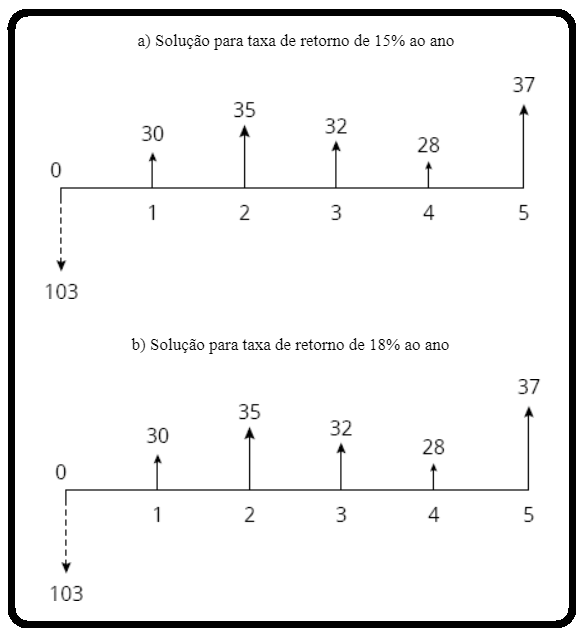


In [2]:

# investimento a
invest_a = Investimento(
    taxa=0.15,
    fluxo_caixa=[
        -103,
        30, 35, 32, 28, 37
    ])

# investimento b
invest_b = Investimento(
    taxa=0.18,
    fluxo_caixa=[
        -103,
        30, 35, 32, 28, 37
    ])

comparar_invest_via_vpl(invest_a, invest_b)


Comparação de investimentos com mesmo período de tempo (5) considerando VPL.
Investimento 1:  5.0
Investimento 2:  -2.35
Melhor investimento, considerando maior valor de VPL é:  5.0
